In [ ]:
#Loading Libraries

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Data Loading

In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


# Data Exploration

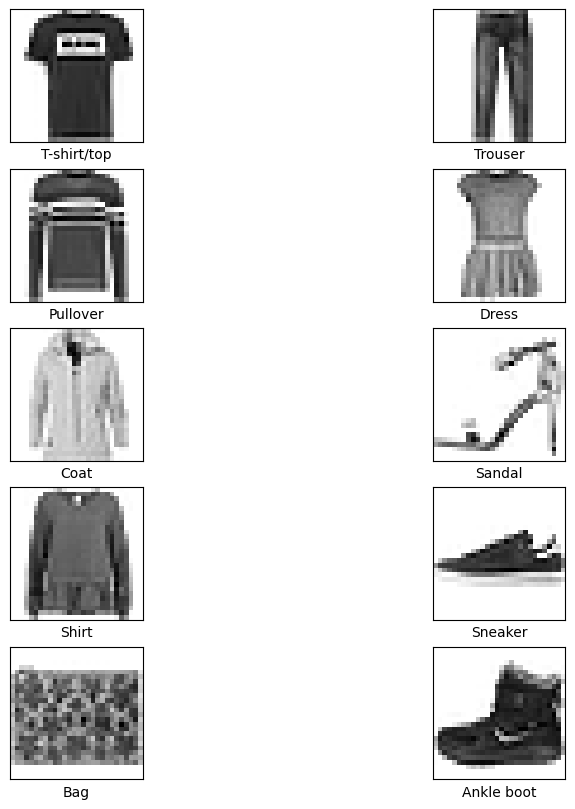

In [ ]:
# Data Exploration

import matplotlib.pyplot as plt
import numpy as np

# Class names in the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plotting a sample from each class
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5, 2, i+1)
    # Find an image in each class
    sample_image = train_images[train_labels == i][0]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_image, cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
plt.show()


# Normalization

In [ ]:
# Normalization

train_images = train_images / 255.0
test_images = test_images / 255.0


# Data Formatting

In [ ]:
# Data Formatting

from tensorflow.keras.utils import to_categorical

# Reshape the data to include a channel dimension
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Model Deployment

### Model -1 Shallow Neural Network

In [ ]:
# Model -1 Shallow Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Model 1: Shallow Neural Network
model_1 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Architecture:

Input Layer: Flattens the input image of size 28x28 pixels.
Hidden Layer: A dense layer with a moderate number of neurons (e.g., 128), using the ReLU activation function for non-linearity.
Output Layer: A dense layer with 10 neurons (one for each class), using the softmax activation function to output probabilities for each class.

### Model 2 : Basic CNN

In [ ]:
# Basic CNN

from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Model 2: Basic CNN
model_2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Architecture:

Convolutional Layer #1: Extracts features such as edges and simple textures.
Pooling Layer #1: Reduces spatial dimensions.
Flatten Layer: Flattens the output for the dense layer.
Output Layer: Final classification layer.

### Model 3: Deeper CNN

In [ ]:
# Model 3: Deeper CNN
model_3 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model_3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0         
 g2D)                                                 

### splitting the data into training and testing dataset

In [ ]:
# splitting the data into training and testing dataset

from sklearn.model_selection import train_test_split

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    # Path to save the model file
    checkpoint_filepath = f'best_weights_{model.name}.h5'

    # Callback to save the best model
    model_checkpoint = ModelCheckpoint(
        checkpoint_filepath, save_best_only=True, monitor='val_accuracy', mode='max')

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), callbacks=[model_checkpoint])

    # Load best weights
    model.load_weights(checkpoint_filepath)

    return history




In [ ]:
    # Parameters
epochs = 10
batch_size = 64

# Train Model 1: Shallow Neural Network
history_1 = train_model(model_1, X_train, y_train, X_val, y_val, epochs, batch_size)

# Train Model 2: Basic CNN
history_2 = train_model(model_2, X_train, y_train, X_val, y_val, epochs, batch_size)

# Train Model 3: Deeper CNN
history_3 = train_model(model_3, X_train, y_train, X_val, y_val, epochs, batch_size)

Epoch 1/10
750/750 [==============================] - 11s 12ms/step - loss: 0.5373 - accuracy: 0.8142 - val_loss: 0.4781 - val_accuracy: 0.8314
Epoch 2/10
 14/750 [..............................] - ETA: 6s - loss: 0.4043 - accuracy: 0.8527

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 6s 8ms/step - loss: 0.3979 - accuracy: 0.8583 - val_loss: 0.4183 - val_accuracy: 0.8523
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3609 - accuracy: 0.8696 - val_loss: 0.3712 - val_accuracy: 0.8670
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3320 - accuracy: 0.8796 - val_loss: 0.3426 - val_accuracy: 0.8761
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3114 - accuracy: 0.8876 - val_loss: 0.3520 - val_accuracy: 0.8727
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2971 - accuracy: 0.8913 - val_loss: 0.3333 - val_accuracy: 0.8798
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2846 - accuracy: 0.8958 - val_loss: 0.3579 - val_accuracy: 0.8751
Epoch 8/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2732 - accuracy: 0.9002 - val_loss: 0.3204 - val_accuracy: 0.8839
Epoch 9/10
750/75

KeyboardInterrupt: 

### Plot Training and Validation Metrics


In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(12, 8))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

# Plot the histories
plot_history([('model 1', history_1),
              ('model 2', history_2),
              ('model 3', history_3)])


### Evaluating  Model on Test Data


In [ ]:
# Evaluate each model on test data
test_loss_1, test_accuracy_1 = model_1.evaluate(test_images, test_labels, verbose=0)
test_loss_2, test_accuracy_2 = model_2.evaluate(test_images, test_labels, verbose=0)
test_loss_3, test_accuracy_3 = model_3.evaluate(test_images, test_labels, verbose=0)

print(f'Model 1 Accuracy: {test_accuracy_1:.3f}')
print(f'Model 2 Accuracy: {test_accuracy_2:.3f}')
print(f'Model 3 Accuracy: {test_accuracy_3:.3f}')

#### Combining the predictions from all three models by averaging them. Then, determine the accuracy of this ensemble method.

In [ ]:
import numpy as np

# Make predictions with each model
predictions_1 = model_1.predict(test_images)
predictions_2 = model_2.predict(test_images)
predictions_3 = model_3.predict(test_images)

# Average the predictions
average_predictions = (predictions_1 + predictions_2 + predictions_3) / 3

# Convert averaged predictions to final predicted classes
final_predictions = np.argmax(average_predictions, axis=1)

# Convert test labels from one-hot to integers for comparison
test_true_labels = np.argmax(test_labels, axis=1)

# Calculate the accuracy of the committee
committee_accuracy = np.mean(final_predictions == test_true_labels)
print(f'Committee Accuracy: {committee_accuracy:.3f}')


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_true_labels, final_predictions, target_names=class_names))


## Performance Metrics & Analysis:


### visualization of  confusion matrices

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions to class labels
pred_labels_1 = np.argmax(predictions_1, axis=1)
pred_labels_2 = np.argmax(predictions_2, axis=1)
pred_labels_3 = np.argmax(predictions_3, axis=1)

# Confusion matrices
cm1 = confusion_matrix(test_true_labels, pred_labels_1)
cm2 = confusion_matrix(test_true_labels, pred_labels_2)
cm3 = confusion_matrix(test_true_labels, pred_labels_3)
committee_cm = confusion_matrix(test_true_labels, final_predictions)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)

# Plotting confusion matrices
plot_confusion_matrix(cm1, 'Confusion Matrix for Model 1')
plot_confusion_matrix(cm2, 'Confusion Matrix for Model 2')
plot_confusion_matrix(cm3, 'Confusion Matrix for Model 3')
plot_confusion_matrix(committee_cm, 'Confusion Matrix for Committee')


### Classification report

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report for Model 1:")
print(classification_report(test_true_labels, pred_labels_1, target_names=class_names))

print("Classification Report for Model 2:")
print(classification_report(test_true_labels, pred_labels_2, target_names=class_names))

print("Classification Report for Model 3:")
print(classification_report(test_true_labels, pred_labels_3, target_names=class_names))

print("Classification Report for Committee:")
print(classification_report(test_true_labels, final_predictions, target_names=class_names))


### Comment the result

Analysis of Results
When analyzing the results from the confusion matrices and classification reports, consider the following:

Precision indicates how accurate the predictions are, i.e., the ratio of correct positive observations to the total predicted positives.
Recall (sensitivity) shows how well the model can find all the positive samples.
F1-Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
Strengths and Weaknesses:

Observe which classes have higher and lower precision and recall. This can indicate sensitivity toward certain types of clothing.
Identify any specific classes where models consistently misclassify. For example, models might confuse 'Shirt' with 'T-shirt/top' or 'Pullover' due to similar shapes.
The committee might show improved metrics overall, indicating effective error mitigation by averaging predictions. However, check if it introduces new types of errors or if it consistently performs better across all classes.
By comparing these metrics, you can effectively understand where each model excels or falls short and how the committee approach enhances or compromises the model performance

### Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images up to 10 degrees
    width_shift_range=0.1,  # Shift the image width by a maximum of 10%
    height_shift_range=0.1,  # Shift the image height by a maximum of 10%
    shear_range=0.1,  # Shear transformation
    zoom_range=0.1,  # Zoom in on the image
    horizontal_flip=True,  # Allow horizontal flipping
    fill_mode='nearest'
)

# Example of defining the model training with data augmentation
model_2.fit(datagen.flow(X_train, y_train, batch_size=32),
            steps_per_epoch=len(X_train) / 32, epochs=10, validation_data=(X_val, y_val))


### Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

# Adding Dropout to Model 3
model_3 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Dropout layer after pooling
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


### Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Adding Batch Normalization to Model 3
model_3 = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])


### Advanced Ensemble Techniques

#### Weighted Accuracy


In [ ]:
# Extract maximum validation accuracy from the training history
model_1_val_acc = max(history_1.history['val_accuracy'])
model_2_val_acc = max(history_2.history['val_accuracy'])
model_3_val_acc = max(history_3.history['val_accuracy'])

import numpy as np

# Calculate weights based on validation accuracies
weights = np.array([model_1_val_acc, model_2_val_acc, model_3_val_acc])
weights /= weights.sum()  # Normalize weights

# Calculate weighted predictions
weighted_predictions = (weights[0] * predictions_1 +
                        weights[1] * predictions_2 +
                        weights[2] * predictions_3)

# Convert weighted predictions to final predicted classes
final_predictions = np.argmax(weighted_predictions, axis=1)

# Calculate the accuracy of the committee
committee_accuracy = np.mean(final_predictions == test_true_labels)
print(f'Weighted Committee Accuracy: {committee_accuracy:.3f}')



In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Define input layer
input_layer = Input(shape=X_train.shape[1:])

# Define first hidden layer (deep part)
hidden1_deep = Dense(30, activation="relu")(input_layer)
hidden1_deep = BatchNormalization()(hidden1_deep)
hidden1_deep = Dropout(0.5)(hidden1_deep)

# Define second hidden layer (deep part)
hidden2_deep = Dense(30, activation="relu")(hidden1_deep)
hidden2_deep = BatchNormalization()(hidden2_deep)
hidden2_deep = Dropout(0.5)(hidden2_deep)

# Concatenate layers from wide and deep parts
concat = Concatenate()([input_layer, hidden2_deep])

# Define output layer
output = Dense(1, activation="sigmoid")(concat)

# Create model
model = Model(inputs=[input_layer], outputs=[output])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Correct the output layer for multi-class classification
output = Dense(10, activation="softmax")(concat)

# Update the model compilation for a classification problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Assuming X_train.shape[1:] is (28, 28, 1) for the Fashion MNIST dataset

# Define input layer
input_layer = Input(shape=(28, 28, 1))

# Flatten the input for the Dense layer
flattened_input = Flatten()(input_layer)

# Define first hidden layer (deep part)
hidden1_deep = Dense(30, activation="relu")(flattened_input)
hidden1_deep = BatchNormalization()(hidden1_deep)
hidden1_deep = Dropout(0.5)(hidden1_deep)

# Define second hidden layer (deep part)
hidden2_deep = Dense(30, activation="relu")(hidden1_deep)
hidden2_deep = BatchNormalization()(hidden2_deep)
hidden2_deep = Dropout(0.5)(hidden2_deep)

# Concatenate layers from wide and deep parts
concat = Concatenate()([flattened_input, hidden2_deep])

# Define output layer
# The output layer must have 10 units for the 10 classes of Fashion MNIST
# and use the 'softmax' activation function for multi-class classification
output = Dense(10, activation="softmax")(concat)

# Create model
model = Model(inputs=[input_layer], outputs=[output])

# Compile the model with appropriate loss function for categorical classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()
